In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [300]:
mgi_BA = pd.read_csv('./MGIgeneExpressionQuery_20220817_hpagenes.txt', sep='\t', index_col=0,
                    low_memory=False)
mgi_BA.head()

,Gene Symbol,Gene Name,MGI Assay ID,Assay Type,Age,Theiler Stage,Structure,Cell Type,Detected,TPM Level (RNA-Seq),...,Images,Mutant Allele(s),Strain,Sex,Notes (RNA-Seq),TPM (avg_quantile normalization),MGI Reference ID,PubMed ID,Citation,Unnamed: 21
MGI Gene ID,,,,,,,,,,,,,,,,,,,,,
MGI:2681839,Aars2,"alanyl-tRNA synthetase 2, mitochondrial",E-MTAB-4528,RNA-Seq,P,28,soleus,NaN,Yes,Low,...,NaN,NaN,NaN,NaN,wild type,1.0,E-MTAB-4528,NaN,RNA-seq of cold-induced transcriptome changes ...,NaN
MGI:2681839,Aars2,"alanyl-tRNA synthetase 2, mitochondrial",E-GEOD-77720,RNA-Seq,P,28,brain,NaN,Yes,Medium,...,NaN,NaN,C57BL/6,NaN,NaN,33.0,E-GEOD-77720,NaN,Transcription profiling by high throughput seq...,NaN
MGI:2681839,Aars2,"alanyl-tRNA synthetase 2, mitochondrial",E-MTAB-4526,RNA-Seq,P,28,adipose tissue,NaN,Yes,Low,...,NaN,NaN,NaN,NaN,wild type,1.0,E-MTAB-4526,NaN,RNA-seq of cold-induced transcriptome changes ...,NaN
MGI:2681839,Aars2,"alanyl-tRNA synthetase 2, mitochondrial",E-GEOD-77720,RNA-Seq,P,28,spinal cord,NaN,Yes,Medium,...,NaN,NaN,C57BL/6,NaN,NaN,30.0,E-GEOD-77720,NaN,Transcription profiling by high throughput seq...,NaN
MGI:2681839,Aars2,"alanyl-tRNA synthetase 2, mitochondrial",E-MTAB-2328,RNA-Seq,P4,28,brain,NaN,Yes,Medium,...,NaN,NaN,C57BL/6J,NaN,NaN,16.0,E-MTAB-2328,NaN,Transcription profiling by high throughput seq...,NaN


In [301]:
mgi_BA.columns

Index(['Gene Symbol', 'Gene Name', 'MGI Assay ID', 'Assay Type', 'Age',
       'Theiler Stage', 'Structure', 'Cell Type', 'Detected',
       'TPM Level (RNA-Seq)', 'Biological Replicates (RNA-Seq)', 'Images',
       'Mutant Allele(s)', 'Strain', 'Sex', 'Notes (RNA-Seq)',
       'TPM (avg_quantile normalization)', 'MGI Reference ID', 'PubMed ID',
       'Citation', 'Unnamed: 21'],
      dtype='object')

In [302]:
mgi_BA['Assay Type'].unique()

array(['RNA-Seq', 'RNA in situ', 'Immunohistochemistry', 'Western blot',
       'Northern blot', 'RT-PCR', 'In situ reporter (knock in)',
       'Nuclease S1', 'RNase protection'], dtype=object)

In [303]:
mgi_BA.shape

(106651, 21)

In [304]:
#prot_mgi_BA = mgi_BA[mgi_BA['Assay Type'].isin(['Immunohistochemistry', 'Western blot'])]
#prot_mgi_BA.shape

In [305]:
adult_mgi_BA = mgi_BA[mgi_BA['Age'] == 'P adult']
adult_mgi_BA.shape

(22220, 21)

In [306]:
print(len(adult_mgi_BA['Structure'].unique()))

322


In [307]:
mgi_loc_BA = adult_mgi_BA[['Structure', 'Gene Name']].copy()
mgi_loc_BA.head()

,Structure,Gene Name
MGI Gene ID,,
MGI:2681839,upper leg muscle,"alanyl-tRNA synthetase 2, mitochondrial"
MGI:2681839,quadriceps femoris muscle,"alanyl-tRNA synthetase 2, mitochondrial"
MGI:2681839,quadriceps femoris muscle,"alanyl-tRNA synthetase 2, mitochondrial"
MGI:2681839,quadriceps femoris muscle,"alanyl-tRNA synthetase 2, mitochondrial"
MGI:2681839,arcuate nucleus,"alanyl-tRNA synthetase 2, mitochondrial"


In [308]:
print(list(mgi_loc_BA['Structure'].unique()))

['upper leg muscle', 'quadriceps femoris muscle', 'arcuate nucleus', 'dorsal raphe nucleus', 'visual cortex', 'telencephalon subventricular zone', 'hypothalamus', 'dentate gyrus', 'hippocampus', 'corpus striatum', 'main olfactory bulb', 'adrenal medulla', 'spleen', 'thymus', 'heart', 'heart left ventricle', 'liver', 'lung', 'right lung middle lobe', 'metanephros', 'testis', 'ascending colon', 'carotid body', 'brain', 'thyroid gland', 'stomach', 'gallbladder', 'cartilage', 'parathyroid gland', 'submandibular gland', 'pancreas', 'duodenum', 'tongue', 'cecum', 'small intestine', 'ileum', 'jejunum', "Peyer's patch", 'cerebral cortex', 'brainstem', 'pituitary gland', 'olfactory lobe', 'cerebellum', 'adrenal gland', 'prostate gland', 'large intestine', 'aorta', 'oviduct', 'uterus', 'lower urinary tract', 'bone', 'spinal cord', 'trigeminal nerve', 'peripheral nervous system', 'trachea', 'placenta', 'skeletal muscle', 'white fat', 'skin', 'esophagus', 'ductus deferens', 'ovary', 'cerebellum gr

In [353]:
organ_list = ['upper leg muscle', 'quadriceps femoris muscle', 'arcuate nucleus', 'dorsal raphe nucleus', 
              'visual cortex', 'telencephalon subventricular zone', 'hypothalamus', 'dentate gyrus', 'hippocampus', 
              'corpus striatum', 'main olfactory bulb', 'adrenal medulla', 'spleen', 'thymus', 'heart', 
              'heart left ventricle', 'liver', 'lung', 'right lung middle lobe', 'metanephros', 'testis', 
              'ascending colon', 'carotid body', 'brain', 'thyroid gland', 'stomach', 'gallbladder', 'cartilage', 
              'parathyroid gland', 'submandibular gland', 'pancreas', 'duodenum', 'tongue', 'cecum', 'small intestine', 
              'ileum', 'jejunum', "Peyer's patch", 'cerebral cortex', 'brainstem', 'pituitary gland', 'olfactory lobe', 
              'cerebellum', 'adrenal gland', 'prostate gland', 'large intestine', 'aorta', 'oviduct', 'uterus', 
              'lower urinary tract', 'bone', 'spinal cord', 'trigeminal nerve', 'peripheral nervous system', 
              'trachea', 'placenta', 'skeletal muscle', 'white fat', 'skin', 'esophagus', 'ductus deferens', 
              'ovary', 'cerebellum granule cell layer', 'mouse', 'lens anterior epithelium', 
              'lens equatorial epithelium', 'ureteral smooth muscle layer', 'renal proximal convoluted tubule', 
              'segment 2 of proximal tubule', 'renal proximal tubule', 'proximal straight tubule, cortical portion', 
              'proximal straight tubule of outer stripe of outer medulla', 'loop of Henle thin descending limb', 
              'loop of Henle, inner medullary portion', 'thin descending limb of inner medulla', 
              'glomerular capillary system', 'renal cortical capillary', 'renal medullary capillary', 
              'renal corpuscle', 'renal cortex', 'juxtaglomerular complex', 'renal cortical vasculature', 
              'renal medulla', 'inner renal medulla', 'outer renal medulla', 'inner stripe of outer medulla', 
              'loop of Henle of inner stripe of outer medulla', 'thin descending limb of inner stripe of outer medulla', 
              'outer stripe of outer medulla', 'loop of Henle of outer stripe of outer medulla', 
              'renal medullary vasculature', 'renal pelvis', 'pelvic smooth muscle', 
              'blood vessel endothelium', 'renal vasculature', 'ureter', 'blood', 'eye', 'oral epithelium', 
              'mammary gland', 'vascular system', 'lymph node', 'skeletal muscle tissue', 'oocyte', 'midbrain', 
              'retina layer', 'retina outer nuclear layer', 'Harderian gland', 'parotid gland', 'vagina', 'musculature', 
              'cortical renal tubule', 'distal straight tubule of renal cortex', 'renal distal tubule', 'mature nephron', 
              'loop of Henle', 'loop of Henle, outer medullary portion', 
              'premacula segment of distal straight tubule of outer medulla', 
              'premacula segment of distal straight tubule of inner stripe of inner medulla', 
              'distal straight tubule of outer stripe of outer medulla', 'urinary system', 'thalamus', 
              'hindlimb muscle', 'pancreatic acinus', 'renal tubule', 'primary oocyte', 'secondary oocyte', 
              'alveolar sac', 'alveolar septum', 'lung vascular element', 'mesenteric artery', 
              'cerebellum Purkinje cell layer', 'retina ganglion cell layer', 'retina inner nuclear layer', 
              'sebaceous gland', 'epidermis', 'seminiferous tubule', 'intestine epithelium', 'uterine gland', 
              'vasculature of uterus', 'decidua', 'colon', 'mesenteric lymph node', 'brown fat', 
              'seminal vesicle', 'penis', 'epididymis', 'bladder', 'sciatic nerve', 
              'proximal straight tubule, outer medullary portion', 'cornea epithelium', 'hippocampal formation', 
              'dentate gyrus granule cell layer', 'main olfactory bulb external plexiform layer', 
              'main olfactory bulb granule cell layer', 'piriform cortex', 'telencephalon septum', 'spermatocyte', 
              'gonadal fat pad', 'mesenteric adipose tissue', 'sublingual gland', 'bone marrow', 'jaw', 
              'olfactory epithelium', 'vomeronasal organ epithelium', 'spermatogonium', 'muscle tissue', 'intestine', 
              'stomach epithelium', 'medulla oblongata', 'ovary follicle cell', 'Leydig cell', 'choroidal vasculature', 
              'blood vessel', 'small intestine epithelium', 'decidua basalis', 'decidua capsularis', 'submandibular duct', 
              'spinal cord dorsal horn', 'spinal cord white matter', 'dorsal root ganglion', 'red nucleus', 
              'deep cerebellar nucleus', 'neocortex layer', 'cortical layer I', 'cortical layer II', 
              'cortical layer III', 'cortical layer IV', 'cortical layer V', 'cortical layer VI', 'presubiculum', 
              'inferior colliculus', 'superior colliculus', 'telencephalon', 'hippocampus pyramidal cell layer', 
              'hippocampus CA2', 'subiculum', 'germ cell of ovary', 'ovary follicle', 'Sertoli cell', 'hair cortex', 
              'hair shaft', 'hair follicle', 'diaphragm', 'retina', 'ovary growing follicle', 'adipose tissue', 
              'inguinal fat pad', 'renal fat pad', 'cumulus oophorus', 'duodenum epithelium', 'ileum epithelium', 
              'jejunum epithelium', 'intestinal villus', 'cornea endothelium', 'mammary gland epithelium', 
              'colon mucosa', 'anterior olfactory nucleus', 'facial nucleus', 'trigeminal V mesencephalic nucleus', 
              'medial habenular nucleus', 'dorsal thalamus', 'main olfactory bulb mitral cell layer', 'hindbrain', 
              'ovary antral follicle', 'ovary stratum granulosum', 'cortical renal tubule of mature nephron group', 
              'segment 1 of proximal tubule', 'exocrine pancreas', 'pancreatic duct', 'follicle cell of tertiary follicle', 
              'ovary atretic follicle', 'follicle cell of primary follicle', 'follicle cell of secondary follicle', 
              'crypt of lieberkuhn', 'smooth muscle tissue', 'ventromedial hypothalamic nucleus', 'principal nucleus', 
              'adenohypophysis pars anterior', 'adenohypophysis pars intermedia', 'neurohypophysis pars nervosa', 
              'oviduct isthmus', 'endometrium epithelium', 'myometrium', 'hindlimb musculature', 'lens epithelium', 
              'lens fiber', 'visceral pericardium', 'renal lymphatic', 'lymphatic vessel', 'fungiform papillae', 
              'soft palate', 'small intestine crypt of lieberkuhn', 'pigmented retinal epithelium', 
              'photoreceptor layer inner segment', 'photoreceptor layer outer segment', 'retina inner plexiform layer', 
              'interscapular fat pad', 'choroid plexus', 'esophagus epithelium', 'stomach glandular epithelium', 
              'alveolus epithelium', 'urothelium of bladder', 'islets of Langerhans', 'atrium cardiac muscle', 
              'ventricle cardiac muscle', 'macula densa', 'renal interstitium', 'interstitium of the testis', 
              'stomach mucosa', 'aorta smooth muscle', 'ganglion', 'gastrocnemius muscle', 'germ cell of testis', 
              'salivary gland', 'metencephalon basal plate', 'intrahepatic bile duct epithelium', 'limb', 'heart valve', 
              'inferior olivary nucleus', 'trigeminal V spinal sensory nucleus', 'vestibular nucleus', 
              'cerebellum molecular layer', 'corpus callosum', 'cerebellum white matter', 'fimbria hippocampus', 
              'hippocampus CA1', 'globus pallidus', 'main olfactory bulb glomerular layer', 'accumbens nucleus', 
              'cochlear nucleus', 'cuneate nucleus', 'dorsal motor nucleus of vagus nerve', 'hypoglossal nucleus', 
              'raphe nucleus', 'solitary tract nucleus', 'paraventricular hypothalamic nucleus', 
              'lateral geniculate nucleus', 'thalamic nucleus', 'reticular thalamic nucleus', 
              'cerebellum internal granule cell layer', 'cingulate cortex', 'entorhinal cortex', 'subcommissural organ', 
              'brainstem reticular formation', 'pontine reticular nucleus', 'diencephalon', 'epithalamus', 'habenula', 
              'dentate gyrus hilus', 'hippocampus granule cell layer', 'hippocampus CA3', 'amygdala', 'caudate-putamen', 
              'taenia tecta', 'rostral migratory stream', 'area postrema', 'cerebral aqueduct', 'periaqueductal grey', 
              'substantia nigra', 'hippocampus region', 'hypothalamic nucleus']

In [354]:
organ_list2 = ['skeletal muscle', 'skeletal muscle', 'brain', 'brain', 
              'brain', 'brain', 'brain', 'brain', 'brain', 
              'brain', 'brain', 'adrenal', 'spleen', 'thymus', 'heart', 
              'heart', 'liver', 'lung', 'lung', 'kidney', 'testis', 
              'intestine', 'heart', 'brain', 'thyroid gland', 'stomach', 'gallbladder', 'bone', 
              'parathyroid gland', 'oral', 'pancreas', 'intestine', 'oral', 'intestine', 'intestine', 
              'intestine', 'intestine', "intestine", 'brain', 'brain', 'pituitary gland', 'brain', 
              'brain', 'adrenal gland', 'prostate gland', 'intestine', 'heart', 'ovary', 'uterus', 
              'urinary bladder', 'bone', 'central nervous system', 'brain', 'peripheral nervous system', 
              'trachea', 'female', 'skeletal muscle', 'adipose', 'skin', 'esophagus', 'male', 
              'ovary', 'brain', 'non specific', 'ocular', 
              'ocular', 'urinary', 'kidney', 
              'kidney', 'kidney', 'kidney', 
              'kidney', 'kidney', 
              'kidney', 'kidney', 
              'kidney', 'kidney', 'kidney', 
              'kidney', 'kidney', 'kidney', 'kidney', 
              'kidney', 'kidney', 'kidney', 'kidney', 
              'kidney', 'kidney', 
              'kidney', 'kidney', 
              'kidney', 'kidney', 'smooth muscle', 
              'vasculature', 'vasculature', 'urinary', 'vasculature', 'ocular', 'oral', 
              'breast', 'vasculature', 'lymphoid', 'skeletal muscle', 'female', 'brain', 
              'retina', 'retina', 'ocular', 'parotid gland', 'female', 'skeletal muscle', 
              'kidney', 'kidney', 'kidney', 'kidney', 
              'kidney', 'kidney', 
              'kidney', 
              'kidney', 
              'kidney', 'urinary', 'thalamus', 
              'skeletal muscle', 'pancreas', 'kidney', 'female', 'female', 
              'lung', 'lung', 'lung', 'vasculature', 
              'brain', 'retina', 'retina', 
              'skin', 'skin', 'male', 'intestine', 'female', 
              'vasculature', 'female', 'colon', 'lymphoid', 'adipose', 
              'male', 'male', 'epididymis', 'urinary', 'peripheral nervous system', 
              'kidney', 'ocular', 'brain', 
              'brain', 'brain', 
              'brain', 'brain', 'brain', 'male', 
              'adipose', 'adipose', 'oral', 'bone marrow', 'oral', 
              'nasal', 'nasal', 'male', 'skeletal muscle', 'intestine', 
              'intestine', 'brain', 'female', 'male', 'vasculature', 
              'vasculature', 'intestine', 'female', 'female', 'oral', 
              'central nervous system', 'central nervous system', 'central nervous system', 'brain', 
              'brain', 'brain', 'brain', 'brain', 
              'brain', 'brain', 'brain', 'brain',  'brain', 
              'brain', 'brain', 'brain', 'brain',
              'brain', 'brain', 'female', 'female', 'male', 'skin', 
              'skin', 'skin', 'skeletal muscle', 'retina', 'female', 'adipose', 
              'adipose', 'adipose', 'female', 'intestine', 'intestine', 
              'intestine', 'intestine', 'ocular', 'breast', 
              'intestine', 'nasal', 'brain', 'central nervous system', 
              'brain', 'thalamus', 'brain', 'brain', 
              'ovary', 'ovary', 'kidney', 
              'kidney', 'pancreas', 'pancreas', 'female', 
              'ovary', 'female', 'female', 
              'intestine', 'smooth muscle', 'brain', 'brain', 
              'pituitary', 'pituitary', 'pituitary', 
              'female', 'female', 'female', 'skeletal muscle', 'ocular', 
              'ocular', 'heart', 'lymphoid', 'lymphoid', 'oral', 
              'oral', 'intestine', 'retina', 
              'retina', 'retina', 'retina', 
              'adipose', 'vasculature', 'esophagus', 'stomach', 
              'lung', 'urinary', 'pancreas', 'heart', 
              'heart', 'retina', 'kidney', 'testis', 
              'stomach', 'vasculature', 'central nervous system', 'skeletal muscle', 'testis', 
              'oral', 'brain', 'liver', 'skeletal muscle', 'heart', 
              'brain', 'central nervous system', 'brain', 
              'brain', 'brain', 'brain', 'brain', 
              'brain', 'brain', 'brain', 'brain', 
              'brain', 'brain', 'central nervous system', 'central nervous system', 
              'brain', 'brain', 'brain', 
              'brain', 'brain', 'brain', 
              'brain', 'brain', 'brain', 'brain', 
              'brain', 'brain', 'brain', 'thalamus', 'brain', 
              'brain', 'brain', 'brain', 'brain', 'brain', 
              'brain', 'brain', 'brain', 'brain', 'brain', 
              'brain', 'brain', 'brain']

In [355]:
d = {'match': organ_list, 'organ_name': organ_list2}
df2 = pd.DataFrame(data=d)
df2.head()

,match,organ_name
0,upper leg muscle,skeletal muscle
1,quadriceps femoris muscle,skeletal muscle
2,arcuate nucleus,brain
3,dorsal raphe nucleus,brain
4,visual cortex,brain


In [356]:
mgi_loc_BA

,Structure,Gene Name,Organ,organ_group,retina,brain,thymus,lung,testis,thyroid,...,smooth muscle,male,parotid gland,bone marrow,peripheral nervous system,skeletal muscle,non specific,thyroid gland,uterus,Harderian gland
MGI Gene ID,,,,,,,,,,,,,,,,,,,,,
MGI:2681839,upper leg muscle,"alanyl-tRNA synthetase 2, mitochondrial",upper leg muscle,skeletal muscle,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
MGI:2681839,quadriceps femoris muscle,"alanyl-tRNA synthetase 2, mitochondrial",quadriceps femoris muscle,skeletal muscle,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
MGI:2681839,quadriceps femoris muscle,"alanyl-tRNA synthetase 2, mitochondrial",quadriceps femoris muscle,skeletal muscle,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
MGI:2681839,quadriceps femoris muscle,"alanyl-tRNA synthetase 2, mitochondrial",quadriceps femoris muscle,skeletal muscle,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
MGI:2681839,arcuate nucleus,"alanyl-tRNA synthetase 2, mitochondrial",arcuate nucleus,brain,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MGI:103287,testis,"zinc finger (CCCH type), RNA binding motif and...",testis,testis,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
MGI:103287,ascending colon,"zinc finger (CCCH type), RNA binding motif and...",ascending colon,intestine,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MGI:103287,ascending colon,"zinc finger (CCCH type), RNA binding motif and...",ascending colon,intestine,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [178]:
import difflib

In [357]:
mgi_loc_BA['Organ'] = mgi_loc_BA['Structure'].map(lambda x: difflib.get_close_matches(x, organ_list, cutoff=0.1)[0] if len(difflib.get_close_matches(x, organ_list, cutoff=0.1)) > 1 else 'no match')

In [358]:
mgi_loc_BA.Organ.value_counts()

liver                     2480
spleen                    1756
metanephros               1385
testis                    1375
right lung middle lobe    1218
                          ... 
lens epithelium              1
hindlimb musculature         1
hindlimb muscle              1
endometrium epithelium       1
hypothalamic nucleus         1
Name: Organ, Length: 322, dtype: int64

In [359]:
mapping = dict(df2[['match', 'organ_name']].values)
mgi_loc_BA['organ_group'] = mgi_loc_BA.Organ.map(mapping)
mgi_loc_BA

,Structure,Gene Name,Organ,organ_group,retina,brain,thymus,lung,testis,thyroid,...,smooth muscle,male,parotid gland,bone marrow,peripheral nervous system,skeletal muscle,non specific,thyroid gland,uterus,Harderian gland
MGI Gene ID,,,,,,,,,,,,,,,,,,,,,
MGI:2681839,upper leg muscle,"alanyl-tRNA synthetase 2, mitochondrial",upper leg muscle,skeletal muscle,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
MGI:2681839,quadriceps femoris muscle,"alanyl-tRNA synthetase 2, mitochondrial",quadriceps femoris muscle,skeletal muscle,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
MGI:2681839,quadriceps femoris muscle,"alanyl-tRNA synthetase 2, mitochondrial",quadriceps femoris muscle,skeletal muscle,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
MGI:2681839,quadriceps femoris muscle,"alanyl-tRNA synthetase 2, mitochondrial",quadriceps femoris muscle,skeletal muscle,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
MGI:2681839,arcuate nucleus,"alanyl-tRNA synthetase 2, mitochondrial",arcuate nucleus,brain,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MGI:103287,testis,"zinc finger (CCCH type), RNA binding motif and...",testis,testis,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
MGI:103287,ascending colon,"zinc finger (CCCH type), RNA binding motif and...",ascending colon,intestine,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MGI:103287,ascending colon,"zinc finger (CCCH type), RNA binding motif and...",ascending colon,intestine,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [360]:
mgi_loc_BA.organ_group.value_counts()

brain                        6337
liver                        2481
lung                         1763
spleen                       1756
heart                        1699
skeletal muscle              1555
kidney                       1492
testis                       1377
intestine                    1360
thymus                        473
adrenal                       398
female                        116
oral                          108
ovary                         100
central nervous system         88
adipose                        81
ocular                         79
skin                           78
stomach                        74
male                           72
vasculature                    70
pancreas                       55
adrenal gland                  47
urinary                        47
retina                         46
esophagus                      41
trachea                        40
uterus                         38
colon                          36
epididymis    

In [361]:
print(len(adult_mgi_BA['Gene Name'].unique()))

485


In [362]:
mgi_loc_BA2 = mgi_loc_BA.groupby(by=['Gene Name', 'organ_group']).count()
mgi_loc_BA2

Structure  \
Gene Name                                         organ_group                  
2,4-dienoyl CoA reductase 1, mitochondrial        adrenal                  1   
                                                  brain                   14   
                                                  heart                    4   
                                                  intestine                3   
                                                  kidney                   3   
...                                                                      ...   
zinc finger, CCHC domain containing 9, pseudogene brain                    4   
                                                  heart                    1   
                                                  skeletal muscle          2   
                                                  spleen                   1   
                                                  testis                   3   

                                                                   Organ  \
Gene Name                                         organ_group              
2,4-dienoyl CoA reductase 1, mitochondrial        adrenal              1   
                                                  brain               14   
                                                  heart                4   
                                                  intestine            3   
                                                  kidney               3   
...                                                                  ...   
zinc finger, CCHC domain containing 9, pseudogene brain                4   
                                                  heart                1   
                                                  skeletal muscle      2   
                                                  spleen               1   
                                                  testis               3   

                                                                   retina  \
Gene Name                                         organ_group               
2,4-dienoyl CoA reductase 1, mitochondrial        adrenal               1   
                                                  brain                14   
                                                  heart                 4   
                                                  intestine             3   
                                                  kidney                3   
...                                                                   ...   
zinc finger, CCHC domain containing 9, pseudogene brain                 4   
                                                  heart                 1   
                                                  skeletal muscle       2   
                                                  spleen                1   
                                                  testis                3   

                                                                   brain  \
Gene Name                                         organ_group              
2,4-dienoyl CoA reductase 1, mitochondrial        adrenal              1   
                                                  brain               14   
                                                  heart                4   
                                                  intestine            3   
                                                  kidney               3   
...                                                                  ...   
zinc finger, CCHC domain containing 9, pseudogene brain                4   
                                                  heart                1   
                                                  skeletal muscle      2   
                                                  spleen               1   
                                                  testis               3   

                                              

In [363]:
mgi_loc_BA

,Structure,Gene Name,Organ,organ_group,retina,brain,thymus,lung,testis,thyroid,...,smooth muscle,male,parotid gland,bone marrow,peripheral nervous system,skeletal muscle,non specific,thyroid gland,uterus,Harderian gland
MGI Gene ID,,,,,,,,,,,,,,,,,,,,,
MGI:2681839,upper leg muscle,"alanyl-tRNA synthetase 2, mitochondrial",upper leg muscle,skeletal muscle,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
MGI:2681839,quadriceps femoris muscle,"alanyl-tRNA synthetase 2, mitochondrial",quadriceps femoris muscle,skeletal muscle,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
MGI:2681839,quadriceps femoris muscle,"alanyl-tRNA synthetase 2, mitochondrial",quadriceps femoris muscle,skeletal muscle,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
MGI:2681839,quadriceps femoris muscle,"alanyl-tRNA synthetase 2, mitochondrial",quadriceps femoris muscle,skeletal muscle,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
MGI:2681839,arcuate nucleus,"alanyl-tRNA synthetase 2, mitochondrial",arcuate nucleus,brain,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MGI:103287,testis,"zinc finger (CCCH type), RNA binding motif and...",testis,testis,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
MGI:103287,ascending colon,"zinc finger (CCCH type), RNA binding motif and...",ascending colon,intestine,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MGI:103287,ascending colon,"zinc finger (CCCH type), RNA binding motif and...",ascending colon,intestine,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [364]:
orgroup = list(set(organ_list2))

for organ in orgroup:
    mgi_loc_BA[organ] = mgi_loc_BA['organ_group'].str.contains(organ)
    mgi_loc_BA[organ].replace({True: 1, False: 0}, inplace=True)

In [365]:
mgi_loc_BA.head()

,Structure,Gene Name,Organ,organ_group,retina,brain,thymus,lung,testis,thyroid,...,smooth muscle,male,parotid gland,bone marrow,peripheral nervous system,skeletal muscle,non specific,thyroid gland,uterus,Harderian gland
MGI Gene ID,,,,,,,,,,,,,,,,,,,,,
MGI:2681839,upper leg muscle,"alanyl-tRNA synthetase 2, mitochondrial",upper leg muscle,skeletal muscle,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
MGI:2681839,quadriceps femoris muscle,"alanyl-tRNA synthetase 2, mitochondrial",quadriceps femoris muscle,skeletal muscle,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
MGI:2681839,quadriceps femoris muscle,"alanyl-tRNA synthetase 2, mitochondrial",quadriceps femoris muscle,skeletal muscle,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
MGI:2681839,quadriceps femoris muscle,"alanyl-tRNA synthetase 2, mitochondrial",quadriceps femoris muscle,skeletal muscle,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
MGI:2681839,arcuate nucleus,"alanyl-tRNA synthetase 2, mitochondrial",arcuate nucleus,brain,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [366]:
mgi_loc_BA[mgi_loc_BA['Organ'] == 'spleen']

,Structure,Gene Name,Organ,organ_group,retina,brain,thymus,lung,testis,thyroid,...,smooth muscle,male,parotid gland,bone marrow,peripheral nervous system,skeletal muscle,non specific,thyroid gland,uterus,Harderian gland
MGI Gene ID,,,,,,,,,,,,,,,,,,,,,
MGI:2681839,spleen,"alanyl-tRNA synthetase 2, mitochondrial",spleen,spleen,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MGI:2681839,spleen,"alanyl-tRNA synthetase 2, mitochondrial",spleen,spleen,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MGI:2681839,spleen,"alanyl-tRNA synthetase 2, mitochondrial",spleen,spleen,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MGI:2681839,spleen,"alanyl-tRNA synthetase 2, mitochondrial",spleen,spleen,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MGI:2442517,spleen,aminoadipate-semialdehyde dehydrogenase,spleen,spleen,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MGI:98885,spleen,"zinc finger (CCCH type), RNA binding motif and...",spleen,spleen,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MGI:103287,spleen,"zinc finger (CCCH type), RNA binding motif and...",spleen,spleen,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MGI:103287,spleen,"zinc finger (CCCH type), RNA binding motif and...",spleen,spleen,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [367]:
list(set(organ_list2))

['ocular',
 'thymus',
 'thalamus',
 'colon',
 'adrenal',
 'lymphoid',
 'skin',
 'intestine',
 'prostate gland',
 'central nervous system',
 'urinary bladder',
 'lung',
 'nasal',
 'urinary',
 'pancreas',
 'parathyroid gland',
 'retina',
 'testis',
 'female',
 'pituitary gland',
 'trachea',
 'stomach',
 'vasculature',
 'epididymis',
 'gallbladder',
 'adrenal gland',
 'spleen',
 'brain',
 'oral',
 'adipose',
 'breast',
 'smooth muscle',
 'pituitary',
 'male',
 'bone',
 'parotid gland',
 'kidney',
 'bone marrow',
 'ovary',
 'peripheral nervous system',
 'skeletal muscle',
 'non specific',
 'heart',
 'liver',
 'thyroid gland',
 'esophagus',
 'uterus']

In [368]:
mgi_loc_BA2 = mgi_loc_BA[['Gene Name', 'ocular',
 'thymus',
 'thalamus',
 'colon',
 'adrenal',
 'lymphoid',
 'skin',
 'intestine',
 'prostate gland',
 'central nervous system',
 'urinary bladder',
 'lung',
 'nasal',
 'urinary',
 'pancreas',
 'parathyroid gland',
 'retina',
 'testis',
 'female',
 'pituitary gland',
 'trachea',
 'stomach',
 'vasculature',
 'epididymis',
 'gallbladder',
 'adrenal gland',
 'spleen',
 'brain',
 'oral',
 'adipose',
 'breast',
 'smooth muscle',
 'pituitary',
 'male',
 'bone',
 'parotid gland',
 'kidney',
 'bone marrow',
 'ovary',
 'peripheral nervous system',
 'skeletal muscle',
 'non specific',
 'heart',
 'liver',
 'thyroid gland',
 'esophagus',
 'uterus']].copy()

In [369]:
mgi_loc_BA2.head()

,Gene Name,ocular,thymus,thalamus,colon,adrenal,lymphoid,skin,intestine,prostate gland,...,bone marrow,ovary,peripheral nervous system,skeletal muscle,non specific,heart,liver,thyroid gland,esophagus,uterus
MGI Gene ID,,,,,,,,,,,,,,,,,,,,,
MGI:2681839,"alanyl-tRNA synthetase 2, mitochondrial",0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
MGI:2681839,"alanyl-tRNA synthetase 2, mitochondrial",0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
MGI:2681839,"alanyl-tRNA synthetase 2, mitochondrial",0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
MGI:2681839,"alanyl-tRNA synthetase 2, mitochondrial",0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
MGI:2681839,"alanyl-tRNA synthetase 2, mitochondrial",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [370]:
mgi_loc_BA3 = mgi_loc_BA2.groupby(by='Gene Name').sum()
mgi_loc_BA3

,ocular,thymus,thalamus,colon,adrenal,lymphoid,skin,intestine,prostate gland,central nervous system,...,bone marrow,ovary,peripheral nervous system,skeletal muscle,non specific,heart,liver,thyroid gland,esophagus,uterus
Gene Name,,,,,,,,,,,,,,,,,,,,,
"2,4-dienoyl CoA reductase 1, mitochondrial",0,1,0,0,1,0,0,3,0,0,...,0,0,0,4,0,4,6,0,0,0
2-aminoethanethiol (cysteamine) dioxygenase,0,1,0,0,1,0,0,3,0,0,...,0,0,0,4,0,4,6,0,0,0
2-hydroxyacyl-CoA lyase 1,6,1,0,2,4,0,2,9,1,3,...,0,2,1,4,0,5,9,2,1,0
3-hydroxy-3-methylglutaryl-Coenzyme A reductase,0,1,0,0,1,0,0,3,0,0,...,0,0,0,4,0,4,6,0,0,0
3-hydroxyisobutyrate dehydrogenase,0,2,0,0,3,0,1,5,1,1,...,0,4,1,6,0,6,9,4,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zinc finger with KRAB and SCAN domains 4,0,1,0,0,1,0,0,2,0,0,...,0,0,0,2,0,4,6,0,0,0
zinc finger with KRAB and SCAN domains 7,0,1,0,0,1,0,0,3,0,0,...,0,0,0,4,0,4,6,0,0,0
"zinc finger, CCHC domain containing 4",0,1,0,0,1,0,0,3,0,0,...,0,0,0,4,0,4,6,0,0,0


In [371]:
mgi_loc_BA3[mgi_loc_BA3 > 0] = 1
#presence/abscence
mgi_loc_BA3

,ocular,thymus,thalamus,colon,adrenal,lymphoid,skin,intestine,prostate gland,central nervous system,...,bone marrow,ovary,peripheral nervous system,skeletal muscle,non specific,heart,liver,thyroid gland,esophagus,uterus
Gene Name,,,,,,,,,,,,,,,,,,,,,
"2,4-dienoyl CoA reductase 1, mitochondrial",0,1,0,0,1,0,0,1,0,0,...,0,0,0,1,0,1,1,0,0,0
2-aminoethanethiol (cysteamine) dioxygenase,0,1,0,0,1,0,0,1,0,0,...,0,0,0,1,0,1,1,0,0,0
2-hydroxyacyl-CoA lyase 1,1,1,0,1,1,0,1,1,1,1,...,0,1,1,1,0,1,1,1,1,0
3-hydroxy-3-methylglutaryl-Coenzyme A reductase,0,1,0,0,1,0,0,1,0,0,...,0,0,0,1,0,1,1,0,0,0
3-hydroxyisobutyrate dehydrogenase,0,1,0,0,1,0,1,1,1,1,...,0,1,1,1,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zinc finger with KRAB and SCAN domains 4,0,1,0,0,1,0,0,1,0,0,...,0,0,0,1,0,1,1,0,0,0
zinc finger with KRAB and SCAN domains 7,0,1,0,0,1,0,0,1,0,0,...,0,0,0,1,0,1,1,0,0,0
"zinc finger, CCHC domain containing 4",0,1,0,0,1,0,0,1,0,0,...,0,0,0,1,0,1,1,0,0,0


In [372]:
mgi_loc_BA3.shape

(485, 47)

In [373]:
mgi_loc_BA3.dropna(inplace=True)

In [374]:
mgi_loc_BA3.shape

(485, 47)

In [375]:
mgi_loc_BA3.head()

,ocular,thymus,thalamus,colon,adrenal,lymphoid,skin,intestine,prostate gland,central nervous system,...,bone marrow,ovary,peripheral nervous system,skeletal muscle,non specific,heart,liver,thyroid gland,esophagus,uterus
Gene Name,,,,,,,,,,,,,,,,,,,,,
"2,4-dienoyl CoA reductase 1, mitochondrial",0,1,0,0,1,0,0,1,0,0,...,0,0,0,1,0,1,1,0,0,0
2-aminoethanethiol (cysteamine) dioxygenase,0,1,0,0,1,0,0,1,0,0,...,0,0,0,1,0,1,1,0,0,0
2-hydroxyacyl-CoA lyase 1,1,1,0,1,1,0,1,1,1,1,...,0,1,1,1,0,1,1,1,1,0
3-hydroxy-3-methylglutaryl-Coenzyme A reductase,0,1,0,0,1,0,0,1,0,0,...,0,0,0,1,0,1,1,0,0,0
3-hydroxyisobutyrate dehydrogenase,0,1,0,0,1,0,1,1,1,1,...,0,1,1,1,0,1,1,1,1,1


<AxesSubplot:ylabel='Gene Name'>

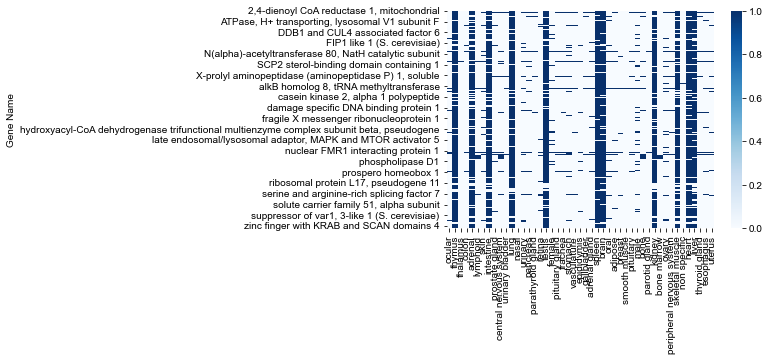

In [376]:
sns.heatmap(data=mgi_loc_BA3, cmap='Blues', xticklabels=True)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


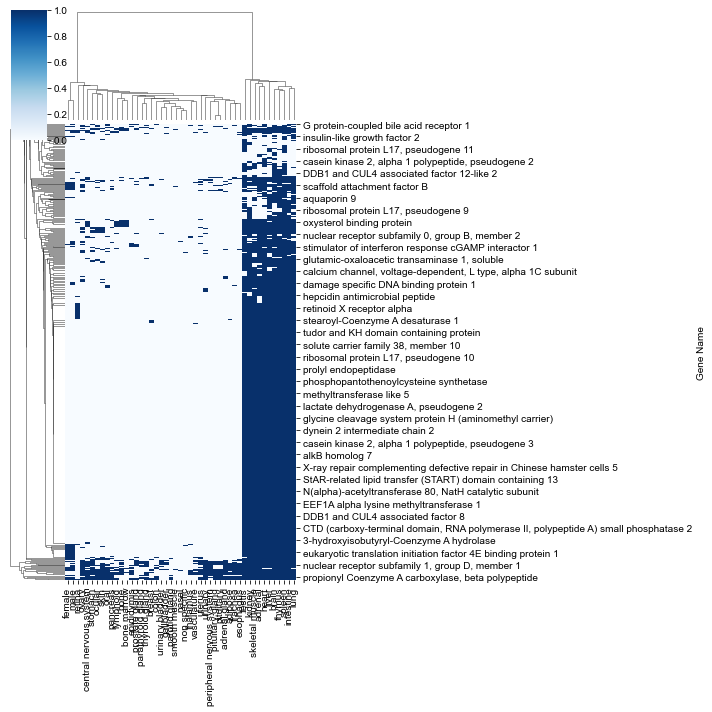

In [377]:
sns.clustermap(data=mgi_loc_BA3, cmap='Blues', xticklabels=True)

## Organ prevalence Summary

In [378]:
summary = mgi_loc_BA3.T
summary.head()

Gene Name,"2,4-dienoyl CoA reductase 1, mitochondrial",2-aminoethanethiol (cysteamine) dioxygenase,2-hydroxyacyl-CoA lyase 1,3-hydroxy-3-methylglutaryl-Coenzyme A reductase,3-hydroxyisobutyrate dehydrogenase,3-hydroxyisobutyryl-Coenzyme A hydrolase,"3-oxoacyl-ACP synthase, mitochondrial",4-aminobutyrate aminotransferase,5-methyltetrahydrofolate-homocysteine methyltransferase reductase,A kinase (PRKA) anchor protein 1,...,ybeY metallopeptidase,"zinc finger (CCCH type), RNA binding motif and serine/arginine rich 1","zinc finger (CCCH type), RNA binding motif and serine/arginine rich 2",zinc finger protein interacting with K protein 1,zinc finger with KRAB and SCAN domains 3,zinc finger with KRAB and SCAN domains 4,zinc finger with KRAB and SCAN domains 7,"zinc finger, CCHC domain containing 4","zinc finger, CCHC domain containing 9","zinc finger, CCHC domain containing 9, pseudogene"
ocular,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
thymus,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
thalamus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
colon,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
adrenal,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0


In [379]:
summary['total_genes'] = summary.sum(axis=1)

In [380]:
summary.head()

Gene Name,"2,4-dienoyl CoA reductase 1, mitochondrial",2-aminoethanethiol (cysteamine) dioxygenase,2-hydroxyacyl-CoA lyase 1,3-hydroxy-3-methylglutaryl-Coenzyme A reductase,3-hydroxyisobutyrate dehydrogenase,3-hydroxyisobutyryl-Coenzyme A hydrolase,"3-oxoacyl-ACP synthase, mitochondrial",4-aminobutyrate aminotransferase,5-methyltetrahydrofolate-homocysteine methyltransferase reductase,A kinase (PRKA) anchor protein 1,...,"zinc finger (CCCH type), RNA binding motif and serine/arginine rich 1","zinc finger (CCCH type), RNA binding motif and serine/arginine rich 2",zinc finger protein interacting with K protein 1,zinc finger with KRAB and SCAN domains 3,zinc finger with KRAB and SCAN domains 4,zinc finger with KRAB and SCAN domains 7,"zinc finger, CCHC domain containing 4","zinc finger, CCHC domain containing 9","zinc finger, CCHC domain containing 9, pseudogene",total_genes
ocular,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,31
thymus,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,438
thalamus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
colon,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
adrenal,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,401


In [381]:
only_summary = summary[['total_genes']].copy()

<AxesSubplot:xlabel='Gene Name'>

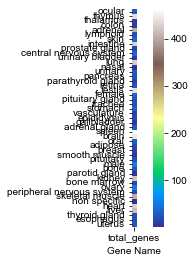

In [382]:
sns.heatmap(data=only_summary, yticklabels=True, square=True, cmap='terrain')

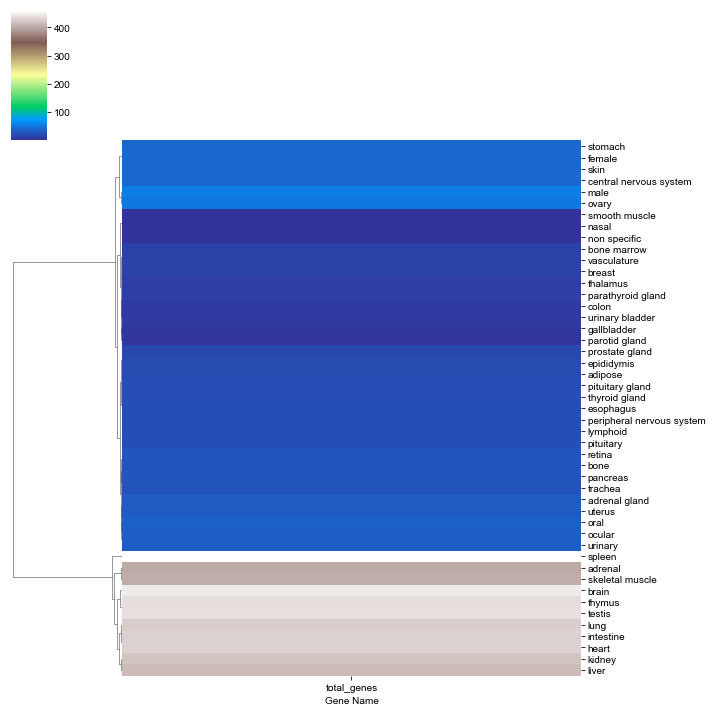

In [383]:
sns.clustermap(data=only_summary, yticklabels=True, col_cluster=False, cmap='terrain')

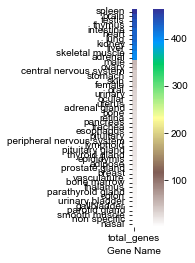

In [384]:
sns.heatmap(data=only_summary.sort_values(by='total_genes', ascending=False), yticklabels=True, 
            square=True, cmap='terrain_r')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('./mgi_bileacid_loc_heatmap.svg', dpi=150, bbox_inches='tight')

In [385]:
only_summary.sort_values(by='total_genes', ascending=False)

Gene Name,total_genes
spleen,462
brain,447
testis,439
thymus,438
intestine,429
heart,429
lung,427
kidney,419
liver,415
skeletal muscle,404


In [299]:
print(list(mgi_loc_BA2['Gene Name'].unique()))

['alanyl-tRNA synthetase 2, mitochondrial', 'aminoadipate-semialdehyde dehydrogenase', '4-aminobutyrate aminotransferase', 'ATP-binding cassette, sub-family B (MDR/TAP), member 1B', 'ATP-binding cassette, sub-family B (MDR/TAP), member 4', 'ATP-binding cassette, sub-family B (MDR/TAP), member 11', 'ATP-binding cassette, sub-family C (CFTR/MRP), member 1', 'ATP-binding cassette, sub-family C (CFTR/MRP), member 2', 'ATP-binding cassette, sub-family C (CFTR/MRP), member 3', 'ATP-binding cassette, sub-family C (CFTR/MRP), member 4', 'ATP binding cassette subfamily G member 5', 'ATP binding cassette subfamily G member 8', 'abhydrolase domain containing 8', 'acetyl-Coenzyme A acyltransferase 1A', 'acetyl-Coenzyme A acyltransferase 2 (mitochondrial 3-oxoacyl-Coenzyme A thiolase)', 'acyl-Coenzyme A dehydrogenase family, member 8', 'acyl-Coenzyme A dehydrogenase, short chain', 'acyl-Coenzyme A dehydrogenase, very long chain', 'acetyl-Coenzyme A acetyltransferase 2', 'acyl-CoA thioesterase 8', '

In [ ]:
### FXR = NR1H4 (liver and intestine)
### PXR = NR1I2 (liver and intestine) - mice
### TGR5 = GPBAR1 (intestine, gallbladder, breast, adipose)
## Others
### CAR = NR1I3 (brain and liver)
### VDR vitamin D3 receptor = NR1I1 (parathyroid, intestinal, brain)

In [ ]:
#FXR activation: CDCA > DCA > LCA > CA (Parks et al., 1999)
#TGR5 activation: LCA > DCA > CDCA > CA (Sato et al., 2008)